In [17]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> stats_model_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
  

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
#file = 'ufc_data_features.csv'
file = 'ufc_data_features_no_outliers.csv'
data = pd.read_csv(loc+file)
#data = data[data.columns[1:]]
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5709,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
5710,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
5711,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


#### <span style='color:green'> **[done]** </span>Filter by weight-class:

In [3]:
weight = 'Welterweight'
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = data[data['weight class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
975,lose,Tom Breese,Sean Strickland,2016-06-04,Welterweight,S-DEC:,-0.00892,-0.438830,-0.018213,0.008337,-0.578426,-2.246673,-0.512074,0.870111,-1.543204,0.736163,-0.877072,-0.268350,1.671822,0.516530,0.553933,0.013389
976,win,Tyron Woodley,Demian Maia,2017-07-29,Welterweight,U-DEC:,1.34476,1.059724,-0.018213,0.008337,-0.795258,0.564518,0.868790,-0.566771,0.328598,0.410948,0.427711,-0.774280,-1.281305,0.056276,-1.732787,0.013389
977,win,Robbie Lawler,Donald Cerrone,2017-07-29,Welterweight,U-DEC:,-0.00892,-0.214047,-0.413070,0.008337,-0.283757,1.091616,-0.276317,-1.141524,-0.387460,0.004429,0.121424,0.490545,1.671822,-0.199420,-0.017747,0.013389


In [4]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-11-19,Muslim Salikhov,Andre Fialho,win,KO/TKO:Kick,-0.008920,1.434363,0.376643,0.008337,0.666967,1.232175,0.195198,0.007982,0.058506,0.898771,-2.316621,1.755370,-0.054481,0.542100,-0.017747,0.013389
1,2018-01-20,Sabah Homasi,Abdul Razak Alhassan,lose,KO/TKO:Punch,-1.362601,-0.214047,0.376643,0.008337,1.017234,0.423958,0.464635,0.007982,0.881345,0.004429,1.775374,-0.689958,-0.054481,-1.708029,-0.589427,2.164739
2,2002-03-22,Jutaro Nakao,Sean Sherk,lose,U-DEC:,-0.008920,-0.663613,-2.782208,0.008337,-2.062890,0.142839,-0.006880,-0.375187,-1.053269,0.248340,-1.005712,-0.942924,1.671822,0.005137,-0.017747,0.013389


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.2, 0.4, 0.27, 0.27, 0.32, 0.59, 0.27, 0.38]
Most significant: ['slpm_dif', 'sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.07,0.01,0.06,0.03
sapm_dif,0.03,0.27,0.08,0.17
slpm_dif,0.2,0.4,0.03,0.07
stance_win_ratio,0.0,0.02,0.0,0.04
str. acc._dif,0.1,0.27,0.03,0.11
str. def_dif,0.13,0.32,0.05,0.16
sub. avg._dif,0.1,0.04,0.38,0.02
td acc._dif,0.07,0.1,0.06,0.17
td avg._dif,0.08,0.07,0.03,0.59


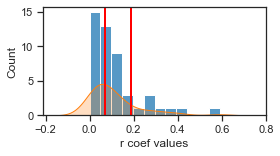

In [5]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(978, 22), train_set=(487, 12), validation_set=(216, 12), test_set=(275, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
975,validation,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,-0.00892,-0.438830,-0.018213,0.008337,-0.578426,-2.246673,-0.512074,0.870111,-1.543204,0.736163,-0.877072,-0.268350,1.671822,0.516530,0.553933,0.013389
976,train,2017-07-29,Tyron Woodley,Demian Maia,win,U-DEC:,1.34476,1.059724,-0.018213,0.008337,-0.795258,0.564518,0.868790,-0.566771,0.328598,0.410948,0.427711,-0.774280,-1.281305,0.056276,-1.732787,0.013389
977,validation,2017-07-29,Robbie Lawler,Donald Cerrone,win,U-DEC:,-0.00892,-0.214047,-0.413070,0.008337,-0.283757,1.091616,-0.276317,-1.141524,-0.387460,0.004429,0.121424,0.490545,1.671822,-0.199420,-0.017747,0.013389


In [7]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
975,validation,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,-0.00892,-0.438830,-0.018213,0.008337,-0.578426,-2.246673,-0.512074,0.870111,-1.543204,0.736163,-0.877072,-0.268350,1.671822,0.516530,0.553933,0.013389,-0.292279,-0.292279,-0.292279,-0.292279
976,train,2017-07-29,Tyron Woodley,Demian Maia,win,U-DEC:,1.34476,1.059724,-0.018213,0.008337,-0.795258,0.564518,0.868790,-0.566771,0.328598,0.410948,0.427711,-0.774280,-1.281305,0.056276,-1.732787,0.013389,1.394712,1.394712,1.394712,1.394712
977,validation,2017-07-29,Robbie Lawler,Donald Cerrone,win,U-DEC:,-0.00892,-0.214047,-0.413070,0.008337,-0.283757,1.091616,-0.276317,-1.141524,-0.387460,0.004429,0.121424,0.490545,1.671822,-0.199420,-0.017747,0.013389,-0.637738,-0.637738,-0.637738,-0.637738


In [8]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.840400


### <span style='color:orange'> **[in-progress]** </span>GridSearch (=Parameter tuning):

In [36]:
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
              #'max_depth': [2, 3, 6],
              'subsample': [0.7, 0.8, 0.85, 0.9, 0.95],
              'n_estimators':[100, 200, 300, 350, 400]
}

xgboost_reg = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=parameters, cv=3,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

AttributeError: 'XGBRegressor' object has no attribute 'decision_function'

In [39]:
grid_search.best_estimator_
grid_search.get_params()
#grid_search.scorer_

{'cv': 3,
 'error_score': 'raise',
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__feature_types': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_threshold': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimat

In [21]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
#rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['squared_error'] = grid_search.cv_results_['mean_test_score'] #grid_search.cv_results_['mean_test_score']
g = grid[grid.squared_error==np.min(grid.squared_error)].reset_index(drop=True)
g

,learning_rate,n_estimators,subsample,squared_error
0,0.25,200,0.7,-0.010018


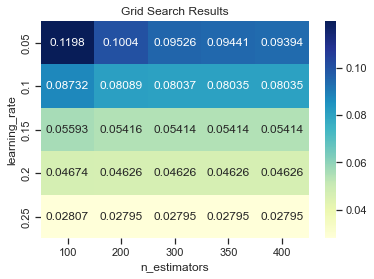

In [22]:
# Create a pivot table of the results
X_axis = 'n_estimators'
y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns=X_axis)

# Create a heatmap plot of the results
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='.4g')
plt.title('Grid Search Results')
plt.xlabel(X_axis)
plt.ylabel(y_axis)
plt.show()


#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [23]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=g.loc[0,'n_estimators'], learning_rate=g.loc[0,'learning_rate'], subsample=g.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
975,validation,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,-0.00892,-0.438830,-0.018213,0.008337,-0.578426,-2.246673,-0.512074,0.870111,-1.543204,0.736163,-0.877072,-0.268350,1.671822,0.516530,0.553933,0.013389,-0.511617,-0.511617,-0.511617,-0.511617
976,train,2017-07-29,Tyron Woodley,Demian Maia,win,U-DEC:,1.34476,1.059724,-0.018213,0.008337,-0.795258,0.564518,0.868790,-0.566771,0.328598,0.410948,0.427711,-0.774280,-1.281305,0.056276,-1.732787,0.013389,1.345276,1.345276,1.345276,1.345276
977,validation,2017-07-29,Robbie Lawler,Donald Cerrone,win,U-DEC:,-0.00892,-0.214047,-0.413070,0.008337,-0.283757,1.091616,-0.276317,-1.141524,-0.387460,0.004429,0.121424,0.490545,1.671822,-0.199420,-0.017747,0.013389,-0.496767,-0.496767,-0.496767,-0.496767


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [26]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg')

../global_variables/stats_pred_welterweight_xgboost_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [28]:
df.to_csv('../data/fight_stat_' + set_lower_cases(weight) + '_data_trained.csv', index=None)
print('../data/fight_stat_' + set_lower_cases(weight) + '_data_trained.csv saved.')

../data/fight_stat_welterweight_data_trained.csv saved.


#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

In [35]:
g
        

,learning_rate,n_estimators,subsample,squared_error
0,0.25,200,0.7,-0.010018


In [19]:
param = pd.DataFrame(data={'ml_model':['xgboost_regressor'],
                          'parameter_name':['n_estimators'],
                          'value':[opt_n_estimators],
                          'accuracy':[opt_acc]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv', index=None)
print('../global_variables/ml_models_parameters.csv saved.')

NameError: name 'opt_n_estimators' is not defined

In [14]:
>>>

## <span style='color:green'> **[done]** </span> Random Forest regression model training:

In [15]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(951, 26), train_set=(470, 12), validation_set=(216, 12), test_set=(265, 12)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.542656,-0.542656,-0.542656,-0.542656
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-0.335153,-0.335153,-0.335153,-0.335153
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.079794,-0.079794,-0.079794,-0.079794


In [16]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df, n_estimators=10)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,2016-06-04,Tom Breese,Sean Strickland,lose,S-DEC:,0.011068,-0.396675,0.011143,0.001133,-0.628768,-2.124978,-0.493996,0.758989,-1.401669,0.818039,-0.749613,-0.407408,0.985268,0.526935,0.599149,-0.010244,-0.031073,-0.031073,-0.031073,-0.031073
949,train,2017-07-29,Demian Maia,Tyron Woodley,lose,U-DEC:,-1.343474,-1.074278,0.011143,0.001133,0.804027,-0.551285,-0.862571,0.568310,-0.364213,-0.398160,-0.438214,0.770143,0.985268,-0.035262,1.743551,-0.010244,-1.072566,-1.072566,-1.072566,-1.072566
950,test,2017-07-29,Donald Cerrone,Robbie Lawler,lose,U-DEC:,0.011068,0.205639,0.405905,0.001133,0.291120,-1.075849,0.276662,1.140346,0.356946,0.007239,-0.132922,-0.491519,-1.616731,0.220282,0.026948,-0.010244,-0.272999,-0.272999,-0.272999,-0.272999


In [17]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.859350


#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [18]:
sum_table = pd.DataFrame(columns=['n_estimators','kd_accuracy','str_accuracy','td_accuracy','sub_accuracy','mean_accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256]):
    sum_table = pd.concat([sum_table,get_grad_desc_step(X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

  0%|          | 0/8 [00:00<?, ?it/s]


NameError: name 'get_grad_desc_step' is not defined

In [ ]:
sns.scatterplot(data=sum_table, x='n_estimators', y='mean_accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='mean_accuracy')

t = sum_table[sum_table.mean_accuracy == np.max(sum_table['mean_accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'mean_accuracy']
t

#### <span style='color:green'> **[done]** </span> Tuned model score:

In [ ]:
print('Model Accuracy(=1-percentage error):')
acc = []
for stat in ['kd','str','sub','td']:
    act = df[stat + '_dif'][df.set=='test']
    pred = df[stat + '_dif_pred'][df.set=='test']
    acc.append(get_mean_percentage_error(act=act, pred=pred))
    print(stat + '_dif Accuracy: ' + str(get_mean_percentage_error(act=act, pred=pred)))
print('\nOverall score: %.4f' %np.mean(acc))    